In [1]:
###THIS HAS RFM ANALYSIS

from sklearn.metrics import silhouette_samples, silhouette_score
from pandas.plotting import scatter_matrix
from IPython.display import Image

import matplotlib.pyplot as plt
import seaborn as sns
import re
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

from collections import Counter

from sklearn.cluster import KMeans, DBSCAN

from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Business Understanding (10 points total).
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs? 

It is no secret that the objective of every business is to increase their size whether it be sales or market share which is indicative of growth. Only recently did we hear that Apple has hit a company valuation of one trillion Dollars. One colossal driver for that success is the behind-the-scenes market analytics that researches the consumers willing to spend thousands of dollars on tech products. This is why consumer data is probably one of the most sought after and inaccessible type of data category in the world.

Insights into your customers = Actional intel = $

We were lucky to find a dataset which contained two years worth of transactions for a UK based online retail store. The company sells “unique all-occasion gifts.” The dataset, “E-Commerce Data,” was downloaded from Kaggle: https://www.kaggle.com/carrie1/ecommerce-data

For the last 50 years, one extremely powerful method of understanding a business’s market or customer base is through market segmentation. Companies that try to market products to the masses or approach their marketing through a “one-size-fits-all” methodology will eventually fail. Market segmentation divides the customer base into groups of individuals that are similar in specific ways. The following tables illustrates the core ways of segmenting customers:


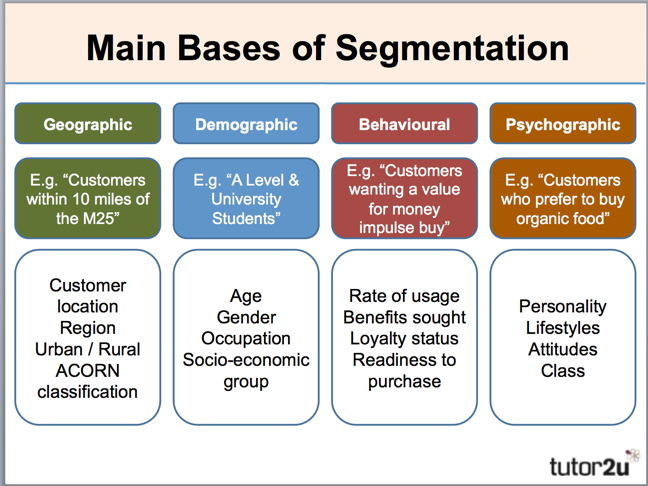

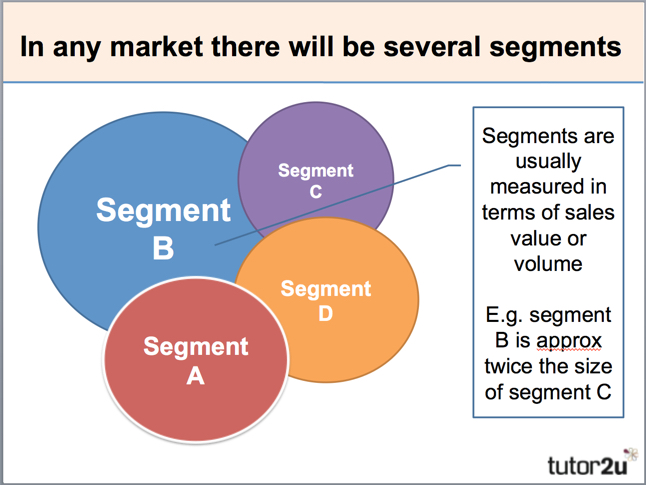

In [2]:
display(Image('https://s3-eu-west-1.amazonaws.com/tutor2u-media/subjects/business/diagrams/marketing-segmentation-bases1.jpg', width=700, unconfined=True))
display(Image('https://s3-eu-west-1.amazonaws.com/tutor2u-media/subjects/business/diagrams/marketing-segments-intro.jpg', width=700, unconfined=True))

The benefits of this practice is invaluable to the business and include: 
1. Marketing efficiency: 80/20 rule focus on the customers that add more value to the business. 
2. Identifying and determining new market opportunities: Through clustering, we can possibly identify missed opportunities.
3. Improved distribution strategies: Clustering using geographical data allows us to funnel more resources towards those areas. 
4. Customer Loyalty: Clustering may possibly identify behavioral and psychological behaviors that drives customer retention towards the business. 
In this project, we will lead an investigation using clustering based methodology to identify and then improve market segmentation for the UK business.  This chosen validation method is proven and practiced all over the world. The most prominent segmentation will be either customer sales which is indicative of size or value to the business or customer geography. 

---
We will follow the protocols outlined in the BLT section 10.8 – Clustering Evaluation to measure the effectiveness of our algorithms/methods. This includes using cluster validity estimation which a measure of goodness of created clusters. Although such measure is inherently subjective, we can still determine clustering tendency of the data set. We can also compare the results of two different sets of cluster analysis. We will also do a visual inspection and determine a similarity matrix. The third evaluation method is to do an internal measure which is the SSE graph vs the number of clusters. Finally, we will be examining the silhouette score as well. 

---

As discussed previously, our chosen validation methods have been suggested by professor Larson and are generally accepted as industry standard. We’ve also determined that for the stakeholder, if the clustering conclusions resulted in actional insights that the business can capitalize on, then we have met their needs. 

Table Sources: https://www.tutor2u.net/business/reference/market-segmentation 

# Data Understanding (20 points total)
Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems? 

### Data Exploration:
There are 541,909 records in our online marketing data research. This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Following are the factor names and descriptions:    --------I will make a table and import it--Murtada

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* Description: Product (item) name. Nominal. 

* Quantity: The quantities of each product (item) per transaction. Numeric.	

* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 

* UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

* Country: Country name. Nominal, the name of the country where each customer resides. 


In [3]:
marketing_data = pd.read_excel('./Data/Online Retail.xlsx')

In [4]:
marketing_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Data types information of each attributes:  
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Find the number of missing values in each column:
print(marketing_data.isnull().sum(axis=0))

na_cols = marketing_data.loc[:,marketing_data.isnull().mean()>.0].columns

for col in na_cols:
    print(col, ' column is ',round(marketing_data[col].isnull().mean(),5)*100,'% null')

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Description  column is  0.268 % null
CustomerID  column is  24.927 % null


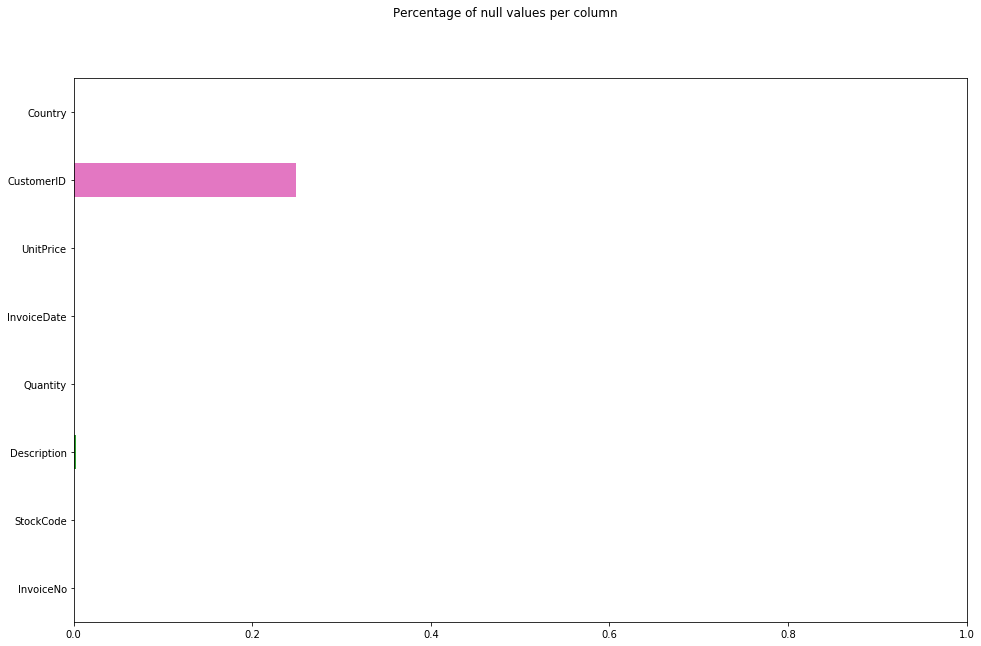

In [7]:
plt.figure(figsize=(16,10))
plt.xlim(0,1)
plt.suptitle('Percentage of null values per column')
marketing_data.isnull().mean().plot.barh();
plt.show()

By looking at the number of missing values in each attribute, there are 135,080 records, almost 25%, that do not have a Customer ID. As our research is based on the customers, we removed the missing from our dataset.

In [8]:
#remove the rows with missing in CustomerID column:
marketing_data.dropna(subset=['CustomerID'], inplace=True)

In [9]:
# Find the first and last orders in our dataset:
marketing_data['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [10]:
marketing_data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

This dataset includes orders done between Dec 2010 and Dec 2011.

In [11]:
marketing_data.shape

(406829, 8)

In [12]:
# Now we have a dataset with no missings
marketing_data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now, checking to identify duplicates in our dataset, we found 5,225 duplicate rows and removed it.

In [13]:
# Find and remove the duplicate records:
print('Duplicated records: {}'.format(marketing_data.duplicated().sum()))
marketing_data.drop_duplicates(inplace = True)

Duplicated records: 5225


In [14]:
marketing_data.shape

(401604, 8)

In [14]:
#Change the rows with missing  data in CustomerID column:
#marketing_data.dropna(subset=['Description'], inplace=True)

#country_map = {'Bahrain':999991, 'EIRE':999992, 'France':999993, 'Hong Kong':999994, 'Israel':999995, 
#               'Portugal':999996, 'Spain':999997, 'Switzerland':999998, 'United Kingdom':999999, 'Unspecified':999990}

#marketing_data['CustomerID'] = np.where(marketing_data.CustomerID.isnull(),marketing_data.Country.map(country_map),
#                                       marketing_data.CustomerID)
#

We are replacing all descriptions that don't have any letters or are not strings.
Crate a new feature in the data set called TotalPrice. This feature will provide some insight into
how much money was spent on a specific item per transaction.

In [15]:
#We do not need this code anymore as after removing missing CustomerIDs, we do not have any misspell in descriptions.

for ind,el in enumerate(marketing_data['Description']):
    if type(el) != str:
        marketing_data.loc['Description',ind]='Unknown'
    elif re.match('.*[a-zA-Z]+.*',el) is not None:
        pass
    else:
        marketing_data.loc[ind,'Description']='Unknown'
        


# New Features: 
in this research, we created some new features that helps us to better understand the data and analyze it. Below are the new features: 

TotalPrice: It is the total price of each items (Quantity * Unit Price)

Recency: It is the number of days since last purchase for each invoice and customer

Frequency: Total number of purchases for each customer (it will be imputed in groupby customer section)

Monetary: Total money that each customer spent (it will be imputed in groupby customer section)


In [16]:
# Create the TotalPrice feature
marketing_data['TotalPrice'] = marketing_data['Quantity']*marketing_data['UnitPrice']

In [17]:
# Create Recency Feature for each invoice:
Current=marketing_data['InvoiceDate'].max()
marketing_data['Recency']=(Current-marketing_data['InvoiceDate']).astype('timedelta64[D]')




In [18]:
marketing_data['Recency']=marketing_data['Recency'].astype(float)


Here Recency column has timedelta64[ns] data type. in order to use it easier in our analysis, 
we only extract the days in integer representing the number of days since the max date in our dataset.

In [19]:
marketing_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.0


In [20]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
TotalPrice     401604 non-null float64
Recency        401604 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 33.7+ MB


In [21]:
per_country = marketing_data.groupby(['Country']).nunique()
per_country= per_country.drop('Country',axis=1)
per_country.reset_index(level=0, inplace=True)
per_country[['Country','InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID']]


,Country,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,Australia,69,600,609,67,66,77,9
1,Austria,19,307,307,23,19,44,11
2,Bahrain,2,16,16,8,2,8,2
3,Belgium,119,778,785,38,119,66,25
4,Brazil,1,32,32,7,1,16,1
5,Canada,6,147,147,19,6,30,4
6,Channel Islands,33,430,436,25,33,55,9
7,Cyprus,20,498,498,29,20,56,8
8,Czech Republic,5,25,25,12,5,17,1
9,Denmark,21,251,252,35,21,44,9


The chart below shows the number of unique customer ID's per country

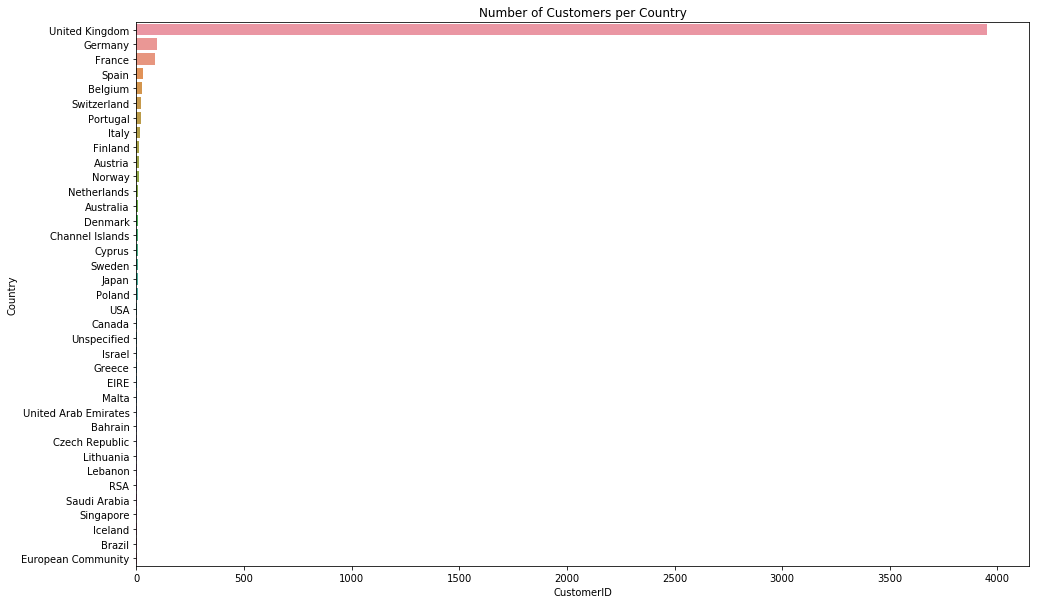

In [22]:
per_country.sort_values(by=['CustomerID'],ascending=False,inplace=True)
num_cust = per_country['CustomerID']
country = per_country['Country']
plt.figure(figsize=(16,10))
#plt.barh(country, num_cust,)
#plt.xticks(y_pos, country )
#ax = sns.barplot(x=num_cust,y=country,orient='h')
#ax.set(xlabel ='Number of Customer', ylabel='Country')
plt.title('Number of Customers per Country')
plt.xlabel('Number of Customers')
#ax.fig.set_size_inches(15,15)
sns.barplot(x=num_cust,y=country,orient='h')
plt.show()

In fact over 90% of customers are from the United Kingdom

90.18% of customers are in the United Kingdom


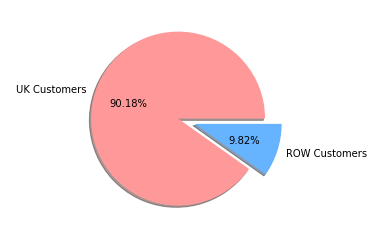

In [23]:
cust_UK_row = per_country.loc[per_country['Country'] =='United Kingdom']
cust_UK = cust_UK_row['CustomerID'].sum()
cust_ROW_row = per_country.loc[per_country['Country']!='United Kingdom']
cust_ROW = cust_ROW_row['CustomerID'].sum()

print ('{0:.2%} of customers are in the United Kingdom'.format((cust_UK/(cust_UK+cust_ROW))))
labels = 'UK Customers','ROW Customers'
cust_count = [cust_UK, cust_ROW]
colors = ['#ff9999','#66b3ff']
explode = [0,0.2]
plt.axis('equal')   
plt.pie(cust_count, labels=labels, explode=explode, colors=colors, autopct='%1.2f%%', shadow=True, startangle=0)
plt.show()

In [24]:
count_by_country = marketing_data.groupby(['Country']).count()
count_by_country['Avg_UnitPrice'] = marketing_data.groupby(['Country'])['UnitPrice'].mean()
count_by_country['Avg_Quantity'] = marketing_data.groupby(['Country'])['Quantity'].mean()
count_by_country['Avg_TotalPrice'] = marketing_data.groupby(['Country'])['TotalPrice'].mean()
count_by_country.reset_index(level=0, inplace=True)
count_by_country.sort_values(by=['CustomerID'],ascending=False,inplace=True)


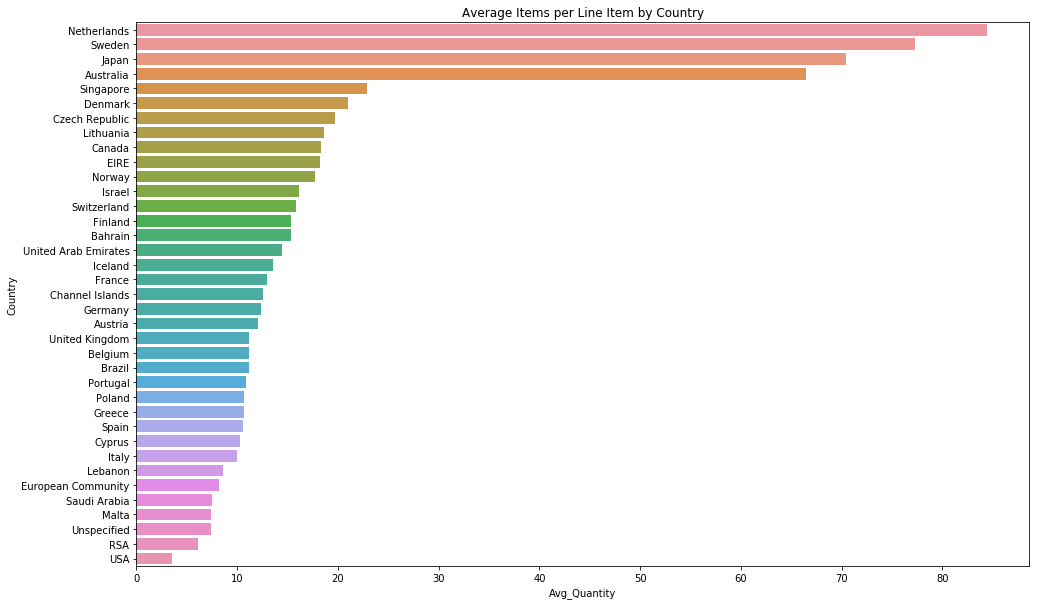

,Avg_Quantity,Country
23,84.406580,Netherlands
31,77.292842,Sweden
19,70.441341,Japan
0,66.488871,Australia
29,22.855895,Singapore
9,21.048843,Denmark
8,19.733333,Czech Republic
21,18.628571,Lithuania
5,18.298013,Canada
10,18.218997,EIRE


In [25]:
count_by_country.sort_values(by=['Avg_Quantity'],ascending=False,inplace=True)
avg_quantity = count_by_country['Avg_Quantity']

country = count_by_country['Country']
plt.figure(figsize=(16,10))
plt.title('Average Items per Line Item by Country')
plt.xlabel('Number of Customers')
#ax.fig.set_size_inches(15,15)
sns.barplot(x=avg_quantity,y=country,orient='h')
plt.show()
display(count_by_country[['Avg_Quantity', 'Country']])

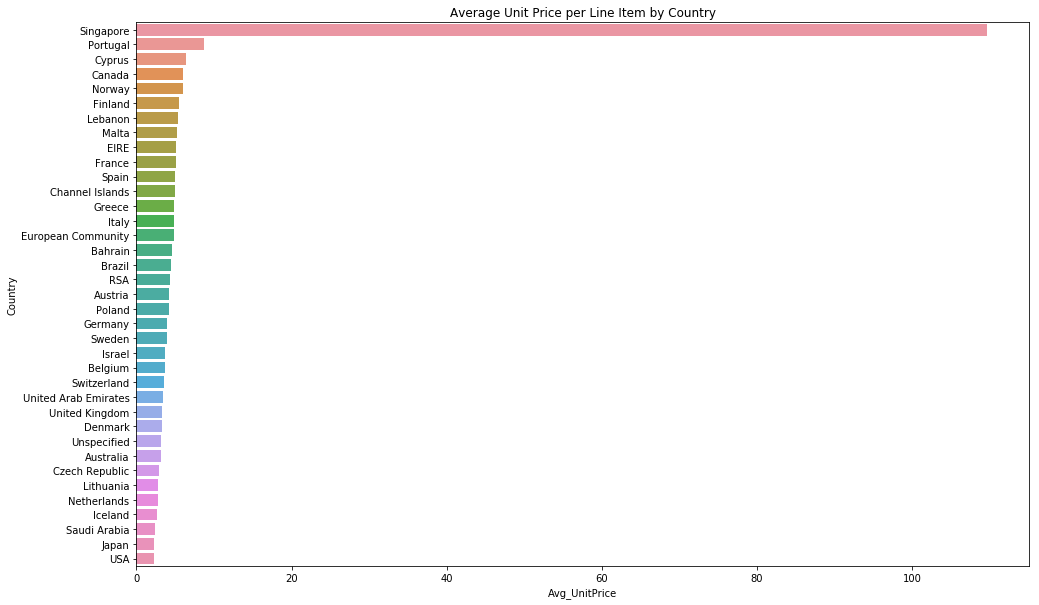

,Avg_UnitPrice,Country
29,109.645808,Singapore
26,8.771754,Portugal
7,6.350311,Cyprus
5,6.030331,Canada
24,6.012026,Norway
12,5.448705,Finland
20,5.387556,Lebanon
22,5.244173,Malta
10,5.111607,EIRE
13,5.053124,France


In [26]:
count_by_country.sort_values(by=['Avg_UnitPrice'],ascending=False,inplace=True)
avg_price = count_by_country['Avg_UnitPrice']

country = count_by_country['Country']
plt.figure(figsize=(16,10))
plt.title('Average Unit Price per Line Item by Country')
plt.xlabel('Number of Customers')
total = float(len(count_by_country))
#ax.fig.set_size_inches(16,10)
sns.barplot(x=avg_price,y=country,orient='h')
plt.show()
display(count_by_country[['Avg_UnitPrice', 'Country']])

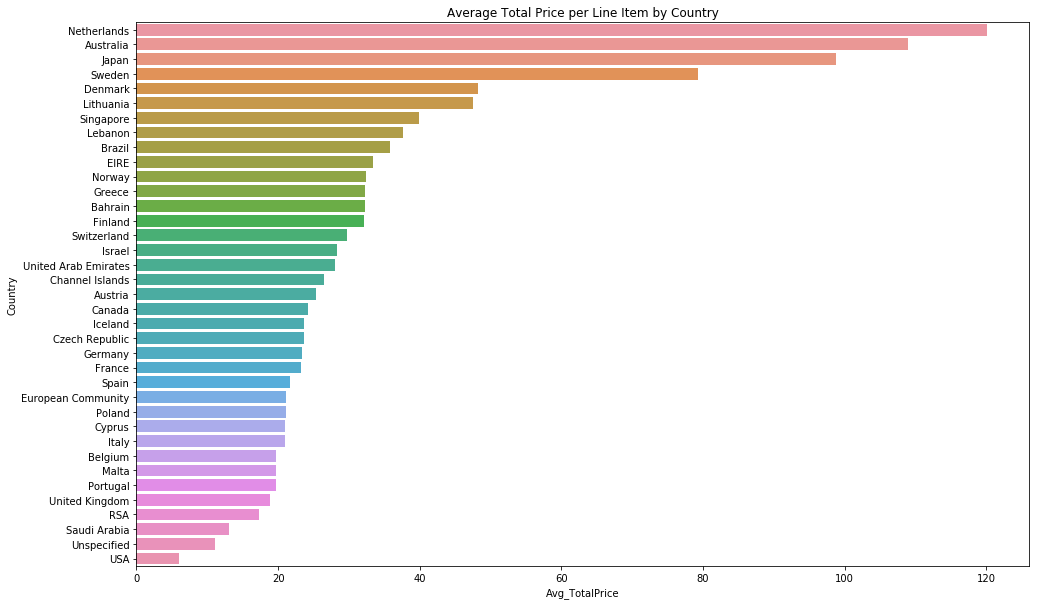

,Avg_TotalPrice,Country
23,120.059696,Netherlands
0,108.910787,Australia
19,98.716816,Japan
31,79.360976,Sweden
9,48.247147,Denmark
21,47.458857,Lithuania
29,39.827031,Singapore
20,37.641778,Lebanon
4,35.737500,Brazil
10,33.445054,EIRE


In [27]:
count_by_country.sort_values(by=['Avg_TotalPrice'],ascending=False,inplace=True)
avg_sale = count_by_country['Avg_TotalPrice']

country = count_by_country['Country']
plt.figure(figsize=(16,10))
plt.title('Average Total Price per Line Item by Country')
plt.xlabel('Number of Customers')
#ax.fig.set_size_inches(15,15)
sns.barplot(x=avg_sale,y=country,orient='h')
plt.show()
display(count_by_country[['Avg_TotalPrice', 'Country']])

Here we examine each transaction's Total Price  by country, looking for outliers.  Since Total Price is a combination of Quantity and Unit Price, we will be able to check both of these features with this chart.

,Quantity,UnitPrice,CustomerID,TotalPrice,Recency
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638,151.499186
std,250.283037,69.764035,1714.006089,430.352218,112.722740
min,-80995.000000,0.000000,12346.000000,-168469.600000,0.000000
25%,2.000000,1.250000,13939.000000,4.250000,50.000000
50%,5.000000,1.950000,15145.000000,11.700000,132.000000
75%,12.000000,3.750000,16784.000000,19.800000,246.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,373.000000


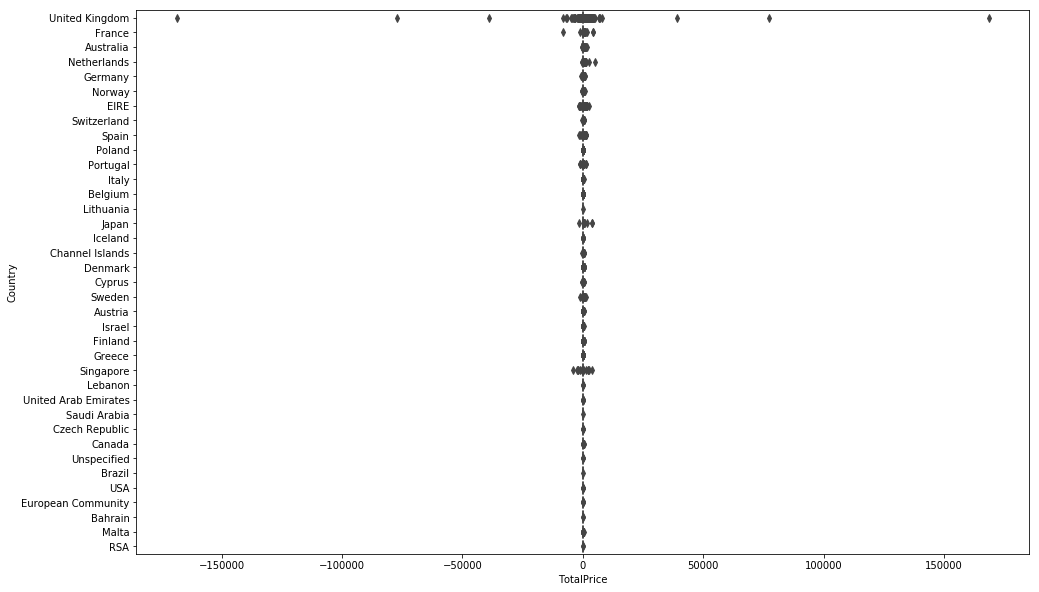

In [28]:
marketing_data['TotalPrice'] = marketing_data['UnitPrice'] *  marketing_data['Quantity']
plt.figure(figsize=(16,10))
sns.boxplot(x='TotalPrice', y='Country', data=marketing_data, orient='h')
display (marketing_data.describe())

The graph above is not very granular, however we can see some outliers from the United Kingdom.  The outlier seem to be symetric so we need to examine these.  The outliers appear to all be above $3500 and below -$3500.  Below we look for the transactions that meet this criteria.

In [29]:
min_sales = marketing_data.loc[(marketing_data['TotalPrice'] < -35000)]
max_sales = marketing_data.loc[(marketing_data['TotalPrice'] > 35000)]

display(min_sales)
display(max_sales)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,325.0
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.0,181.0
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6,0.0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,325.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.0,181.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,0.0


The Invoice numbers for all the high value negative transactions have a 'C' at the beginning.  We can speculate these are cancelled orders.  The Stock codes for two of the three matching transactions also match.  This is further proof these are not mistakes, but actual orders that were cancelled.  We will retain them in the data set.

In [30]:
#
# Create some lists for visualizations
#
count_by_country = marketing_data.groupby(['Country']).count()
count_by_country['Avg_UnitPrice'] = marketing_data.groupby(['Country'])['UnitPrice'].mean()
count_by_country['Avg_Quantity'] = marketing_data.groupby(['Country'])['Quantity'].mean()
count_by_country['Avg_TotalPrice'] = marketing_data.groupby(['Country'])['TotalPrice'].mean()
count_by_country.reset_index(level=0, inplace=True)
count_by_country.sort_values(by=['CustomerID'],ascending=False,inplace=True)
count_by_country.reset_index(drop=True,inplace=True)

country = count_by_country['Country']
num_cust = count_by_country['CustomerID'].nunique()

avg_sale = count_by_country['Avg_TotalPrice']

The charts above shows the United Kingdom has far more transactions

#murtada -- what chart? 


## Grouping Values by Invoice Number

There are multiple rows for each transaction due to existing multiple items in each invoice. 

Here we group our dataset by InvoiceNo which results in having one row representing one identical invoice, total transaction value, customer, country, invoice date, total quantity and descriptions plus all other information related to the invoice. 


In [31]:
by_invoice = marketing_data.groupby(['InvoiceNo', 'InvoiceDate','Country','CustomerID', 'Recency'], as_index=False)[ 'UnitPrice','Description','Quantity','TotalPrice'].agg(lambda x: list(x))
by_invoice['TotalPrice'] = by_invoice['TotalPrice'].apply(sum)
by_invoice['QuantityTotal'] = by_invoice['Quantity'].apply(sum)
by_invoice['Description_as_string'] = by_invoice['Description'].apply(lambda x: "-".join(sorted(x)))


In [32]:
by_invoice.head()

,InvoiceNo,InvoiceDate,Country,CustomerID,Recency,UnitPrice,Description,Quantity,TotalPrice,QuantityTotal,Description_as_string
0,536365,2010-12-01 08:26:00,United Kingdom,17850.0,373.0,"[2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25]","[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...","[6, 6, 8, 6, 6, 2, 6]",139.12,40,CREAM CUPID HEARTS COAT HANGER-GLASS STAR FROS...
1,536366,2010-12-01 08:28:00,United Kingdom,17850.0,373.0,"[1.85, 1.85]","[HAND WARMER UNION JACK, HAND WARMER RED POLKA...","[6, 6]",22.20,12,HAND WARMER RED POLKA DOT-HAND WARMER UNION JACK
2,536367,2010-12-01 08:34:00,United Kingdom,13047.0,373.0,"[1.69, 2.1, 2.1, 3.75, 1.65, 4.25, 4.95, 9.95,...","[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...","[32, 6, 6, 8, 6, 6, 3, 2, 3, 3, 4, 4]",278.73,83,ASSORTED COLOUR BIRD ORNAMENT-BOX OF 6 ASSORTE...
3,536368,2010-12-01 08:34:00,United Kingdom,13047.0,373.0,"[4.25, 4.95, 4.95, 4.95]","[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...","[6, 3, 3, 3]",70.05,15,BLUE COAT RACK PARIS FASHION-JAM MAKING SET WI...
4,536369,2010-12-01 08:35:00,United Kingdom,13047.0,373.0,[5.95],[BATH BUILDING BLOCK WORD],[3],17.85,3,BATH BUILDING BLOCK WORD


## Grouping Values by Customer ID

Here our research is based on customers, therefore it is useful to group our dataset by Customer ID and create two other new features (Frequency and Monetary) for each customer from there.

In [32]:
by_customer = by_invoice.groupby(['CustomerID'], as_index=False)['InvoiceNo', 'InvoiceDate', 'Recency', 'Description','Quantity','TotalPrice'].agg(lambda x: list(x))

by_customer['Frequency'] = by_customer['InvoiceNo'].apply(lambda x: len(x))
by_customer['Monetary'] = by_customer['TotalPrice'].apply(sum)
by_customer['Recency'] = by_customer['Recency'].apply(min)
#by_customer['QuantityTotal'] = by_customer['Quantity'].apply(sum)
#by_customer['Description'] = by_customer['Description'].apply(lambda x: "-".join(sorted(x)))



In [33]:
by_customer


,CustomerID,InvoiceNo,InvoiceDate,Recency,Description,Quantity,TotalPrice,Frequency,Monetary
0,12346.0,"[541431, C541433]","[2011-01-18 10:01:00, 2011-01-18 10:17:00]",325.0,"[[MEDIUM CERAMIC TOP STORAGE JAR], [MEDIUM CER...","[[74215], [-74215]]","[77183.6, -77183.6]",2,0.00
1,12347.0,"[537626, 542237, 549222, 556201, 562032, 57351...","[2010-12-07 14:57:00, 2011-01-26 14:30:00, 201...",1.0,"[[BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG...","[[12, 4, 12, 36, 12, 12, 12, 12, 12, 12, 4, 4,...","[711.79, 475.39, 636.25, 382.52, 584.91, 1294....",7,4310.00
2,12348.0,"[539318, 541998, 548955, 568172]","[2010-12-16 19:09:00, 2011-01-25 10:42:00, 201...",74.0,"[[72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASE...","[[72, 72, 24, 120, 24, 120, 72, 144, 144, 48, ...","[892.8000000000001, 227.43999999999997, 367.0,...",4,1797.24
3,12349.0,[577609],[2011-11-21 09:51:00],18.0,"[[PARISIENNE CURIO CABINET, SWEETHEART WALL TI...","[[2, 2, 6, 3, 6, 6, 12, 2, 12, 2, 12, 12, 6, 3...",[1757.55],1,1757.55
4,12350.0,[543037],[2011-02-02 16:01:00],309.0,"[[CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NE...","[[12, 12, 10, 12, 24, 6, 12, 12, 12, 12, 12, 1...",[334.40000000000003],1,334.40
5,12352.0,"[544156, 545323, 545332, 546869, 547390, 56750...","[2011-02-16 12:33:00, 2011-03-01 14:57:00, 201...",35.0,"[[WOODEN HAPPY BIRTHDAY GARLAND, PINK DOUGHNUT...","[[6, 12, 12, 12, 4, 3, 3, 3, 3, 3, 3, 6, 12, 1...","[296.49999999999994, 144.35, 840.3, 120.33, 16...",11,1545.41
6,12353.0,[553900],[2011-05-19 17:47:00],203.0,"[[CERAMIC CAKE STAND + HANGING CAKES, MINI CAK...","[[2, 8, 4, 6]]",[89.0],1,89.00
7,12354.0,[550911],[2011-04-21 13:11:00],231.0,"[[JUMBO BAG ALPHABET, CHARLOTTE BAG APPLES DES...","[[10, 10, 10, 4, 4, 4, 2, 1, 32, 4, 6, 6, 4, 1...",[1079.4],1,1079.40
8,12355.0,[552449],[2011-05-09 13:49:00],213.0,"[[GROW A FLYTRAP OR SUNFLOWER IN TIN, ICE CREA...","[[24, 96, 60, 2, 8, 2, 12, 6, 6, 6, 6, 6, 6]]",[459.4],1,459.40
9,12356.0,"[541430, 549435, 576895]","[2011-01-18 09:50:00, 2011-04-08 12:33:00, 201...",22.0,"[[BAKING SET 9 PIECE RETROSPOT , WHITE HEART C...","[[24, 48, 40, 48, 72, 12, 24, 24, 48, 24, 12, ...","[2271.6200000000003, 481.46, 58.349999999999994]",3,2811.43


### Classify Transaction type

In [34]:
by_invoice['Transaction']=''

for index,row in by_invoice.iterrows():
    if str(row['InvoiceNo']).startswith("C"):
        by_invoice.loc[index,'Transaction'] = 'Cancel'
    elif str(row['InvoiceNo']).startswith("A"):
        by_invoice.loc[index,'Transaction'] = 'Adjust'
    else:
        by_invoice.loc[index,'Transaction'] = 'Purchase'


In [35]:
by_invoice.sample(10)

,InvoiceNo,InvoiceDate,Country,CustomerID,Recency,UnitPrice,Description,Quantity,TotalPrice,QuantityTotal,Description_as_string,Transaction
13887,570715,2011-10-12 10:23:00,United Kingdom,18287.0,58.0,"[2.1, 1.25, 1.65, 1.65, 0.85, 0.85, 2.1, 1.25,...","[HAND WARMER OWL DESIGN, SET OF 3 WOODEN SLEIG...","[12, 12, 12, 12, 24, 24, 6, 24, 24, 24, 48, 24...",1001.32,990,ASSORTED COLOUR LIZARD SUCTION HOOK-ASSORTED M...,Purchase
7563,555521,2011-06-05 11:21:00,United Kingdom,13576.0,187.0,"[3.39, 2.1, 5.95, 1.69, 0.55]","[BLACK RECORD COVER FRAME, RECORD FRAME 7"" SIN...","[72, 48, 3, 12, 12]",389.61,147,BATHROOM METAL SIGN-BEWARE OF THE CAT METAL SI...,Purchase
2395,542777,2011-02-01 08:31:00,EIRE,14911.0,311.0,"[4.25, 4.25, 1.25, 1.25, 1.65, 1.65, 7.95, 7.9...","[AIRLINE BAG VINTAGE JET SET RED, AIRLINE BAG ...","[4, 4, 12, 12, 12, 12, 2, 2, 2, 6, 6, 2, 2, 12...",797.77,463,72 SWEETHEART FAIRY CAKE CASES-AIRLINE BAG VIN...,Purchase
11059,564040,2011-08-22 12:45:00,United Kingdom,14560.0,109.0,"[9.95, 1.45]","[RED RETROSPOT ROUND CAKE TINS, SET OF 72 RETR...","[4, 12]",57.20,16,RED RETROSPOT ROUND CAKE TINS-SET OF 72 RETROS...,Purchase
4914,549054,2011-04-06 10:21:00,United Kingdom,17719.0,247.0,"[3.75, 1.95, 2.55, 2.55, 4.95, 3.95, 3.75, 0.7...","[ALARM CLOCK BAKELIKE PINK, BUTTON BOX , RED R...","[8, 10, 6, 6, 3, 4, 4, 36, 12, 12, 4, 4]",312.19,109,ALARM CLOCK BAKELIKE GREEN-ALARM CLOCK BAKELIK...,Purchase
4769,548650,2011-04-01 13:22:00,United Kingdom,14852.0,251.0,"[1.45, 9.95, 2.95, 2.55, 10.75, 2.95, 0.55, 0....","[HOMEMADE JAM SCENTED CANDLES, TRIPLE PHOTO FR...","[12, 2, 6, 6, 2, 8, 48, 48, 6, 12, 6, 12, 2, 1...",490.40,368,72 SWEETHEART FAIRY CAKE CASES-ANTIQUE SILVER ...,Purchase
3157,544680,2011-02-22 16:19:00,United Kingdom,13077.0,289.0,"[1.25, 1.45, 1.25, 0.85]","[VINTAGE HEADS AND TAILS CARD GAME , PICTURE D...","[2, 2, 2, 2]",9.60,8,HEADS AND TAILS SPORTING FUN-PICTURE DOMINOES-...,Purchase
12504,567545,2011-09-21 10:27:00,United Kingdom,13155.0,79.0,"[0.42, 0.42, 1.65, 2.1, 2.1, 1.95, 7.95, 0.42,...","[WRAP PAISLEY PARK , WRAP VINTAGE LEAF DESIGN,...","[25, 25, 10, 6, 6, 24, 2, 25, 8, 4, 6, 12, 12,...",313.30,183,6 RIBBONS RUSTIC CHARM-CHRISTMAS CRAFT LITTLE ...,Purchase
15924,575607,2011-11-10 12:37:00,United Kingdom,14096.0,29.0,"[16.63, 16.63, 0.83, 0.83, 0.83, 0.83, 2.46, 1...","[TOOL BOX SOFT TOY , DOCTOR'S BAG SOFT TOY, SE...","[1, 2, 3, 1, 5, 1, 8, 1, 4, 8, 1, 3, 2, 1, 4, ...",4358.00,1014,12 PENCIL SMALL TUBE WOODLAND-3 GARDENIA MORRI...,Purchase
4833,548796,2011-04-04 12:42:00,United Kingdom,15752.0,249.0,"[2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.0...","[JUMBO BAG SCANDINAVIAN BLUE PAISLEY, JUMBO BA...","[3, 10, 4, 5, 7, 8, 5, 5, 3, 5, 8, 5, 5, 10, 1...",403.78,340,AREA PATROLLED METAL SIGN-BAKING MOULD CHOCOLA...,Purchase


### This is to join cancelled purchases with their purchase

This joins all cancelled orders with their accompanying purchase. It is difficult to exactly determine what transaction a purchase was associated with so we are doing an inner join on the description, customer ID, total invoice price, and country of customer. From here we filter out any purchases that took place after the cancelled transaction. With all of these conditions we are reasonably certain that we have matched the correct transactions.

In [36]:
purchase_values = marketing_data_grouping[marketing_data_grouping['Transaction']=="Purchase"]

cancel_values = marketing_data_grouping[marketing_data_grouping['Transaction']=="Cancel"]

# cancel_values.loc[:,'TotalPrice'] = -1 * cancel_values.loc[:,'TotalPrice']

cancel_values.TotalPrice = cancel_values.TotalPrice.apply(lambda x: x * -1)

cancel_values.QuantityTotal = cancel_values.QuantityTotal.apply(lambda x: x * -1)

joined_cancel_df = pd.merge(purchase_values, cancel_values, left_on=['Country','CustomerID','Description_as_string','QuantityTotal','TotalPrice'],right_on=['Country','CustomerID','Description_as_string','QuantityTotal','TotalPrice'],
                 suffixes=('_purchase','_cancel'))

joined_cancel_df.drop(['Description_as_string','Description_cancel','Quantity_cancel','Transaction_cancel','UnitPrice_cancel','Transaction_purchase','QuantityTotal'],
            axis=1,inplace=True)



cols = ['InvoiceNo_purchase','InvoiceDate_purchase','InvoiceNo_cancel','InvoiceDate_cancel','Country',
       'CustomerID','Description_purchase','UnitPrice_purchase','TotalPrice']

joined_cancel_df = joined_cancel_df[joined_cancel_df.InvoiceDate_purchase<joined_cancel_df.InvoiceDate_cancel]

joined_cancel_df = joined_cancel_df[cols]

joined_cancel_df = joined_cancel_df.rename({'Description_purchase':'Description','UnitPrice_purchase':'UnitPrice'},axis=1)

joined_cancel_df.sample(5)


NameError: name 'marketing_data_grouping' is not defined

Visualize the any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.

# Modeling and Evaluation (50 points total)
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results.

### Option A: Cluster Analysis --K Means on RFM Customer Behavior
• Perform cluster analysis using several clustering methods
• How did you determine a suitable number of clusters for each method?
• Use internal and/or external validation measures to describe and compare the
clusterings and the clusters (some visual methods would be good).
• Describe your results. What findings are the most interesting and why? 

In [ ]:
#classify = KMeans(init = 'k-means++')

In [ ]:
by_customer.head() 


Why was this data set created? 

This data set accounts for cancelled orders. 

This data set adds RFM variables which stand for Recency, Frequency, and Monetary. 
This analysis is considered one of the best measurements towards successful and objective customer segmentation. 

Recency – How recent did the customer make a purchase in days. How relevant are they. 

Frequency – Do we have a reoccurring customer. A frequent buyer? 

Monetary – What value in sales does this customer bring. 

-----I will add more on RFM analysis– Murtada

Note: The reason the first customer has a zero in Monetary is because they also have a cancelled order.

Source: https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6 

In [232]:
# Duplicated the dataframe to avoid accidental manipulation. 
maa = by_customer

#Isolated the variables that are relevant to the analysis
mad = maa[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
mad.set_index('CustomerID',inplace=True)

mad.head()

#mad.to_excel('C:/Users/Bahr/Desktop/dakas.xlsx')  #Testing dataset accuracy 

#maa.to_excel('C:/Users/Bahr/Desktop/dakasss.xlsx')  #Testing dataset accuracy 

#The following table is an RFM table 

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325.0,2,0.00
12347.0,1.0,7,4310.00
12348.0,74.0,4,1797.24
12349.0,18.0,1,1757.55
12350.0,309.0,1,334.40


In [233]:
#Create customer segments from RFM model using Quartiles 
#Here we want to create an RFM score for each customer to easily identify the customer's behavior. 
#The score is from 1-4 but can be 1-5, etc. 

quant = mad.quantile(q=[0.25,0.5,0.75])
quant

,Recency,Frequency,Monetary
0.25,16.0,1.0,291.795
0.50,49.0,3.0,644.070
0.75,142.0,5.0,1608.335


In [234]:
quant.to_dict()

{'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 291.79499999999996,
  0.5: 644.0699999999999,
  0.75: 1608.335}}

In [235]:
#Here we are creating the RFM segmentation rankings. 
#A rank of 4 will be the highest/best. A rank of 1 will be the worst/lowest. 
#We have two arguments because in case of recency, the lower the number (days) the better. 



#Arguments (x= value, p = recency, monetary_value, frequency, d = quartiles dict)
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#Arguments (x= value, p = recency, monetary_value, frequency, d = quartiles dict)  
def FMscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [236]:

#Create RFM segmentation table
segmentation = mad
segmentation['R_Quartile'] = segmentation['Recency'].apply(Rscore, args=('Recency',quant))
segmentation['F_Quartile'] = segmentation['Frequency'].apply(FMscore, args=('Frequency',quant))
segmentation['M_Quartile'] = segmentation['Monetary'].apply(FMscore, args=('Monetary',quant))



C:\Users\Bahr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Bahr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Bahr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [ ]:
#Now each customer is assigned in a quartile. 

In [238]:
segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325.0,2,0.00,1,2,1
12347.0,1.0,7,4310.00,4,4,4
12348.0,74.0,4,1797.24,2,3,4
12349.0,18.0,1,1757.55,3,1,4
12350.0,309.0,1,334.40,1,1,2


In [239]:
#adding RFM score for each customer

segmentation['RFM_Score'] = segmentation.R_Quartile.map(str) \
                            + segmentation.F_Quartile.map(str) \
                            + segmentation.M_Quartile.map(str)
segmentation.head()



C:\Users\Bahr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325.0,2,0.00,1,2,1,121
12347.0,1.0,7,4310.00,4,4,4,444
12348.0,74.0,4,1797.24,2,3,4,234
12349.0,18.0,1,1757.55,3,1,4,314
12350.0,309.0,1,334.40,1,1,2,112


In [241]:
#Filtering for the "best" Customers.

segmentation[segmentation['RFM_Score']=='444'].head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12347.0,1.0,7,4310.00,4,4,4,444
12359.0,7.0,6,6182.98,4,4,4,444
12362.0,2.0,13,5154.58,4,4,4,444
12381.0,4.0,6,1803.96,4,4,4,444
12388.0,15.0,6,2780.66,4,4,4,444
12395.0,15.0,15,2998.28,4,4,4,444
12417.0,2.0,12,3578.80,4,4,4,444
12423.0,0.0,9,1849.11,4,4,4,444
12433.0,0.0,7,13375.87,4,4,4,444


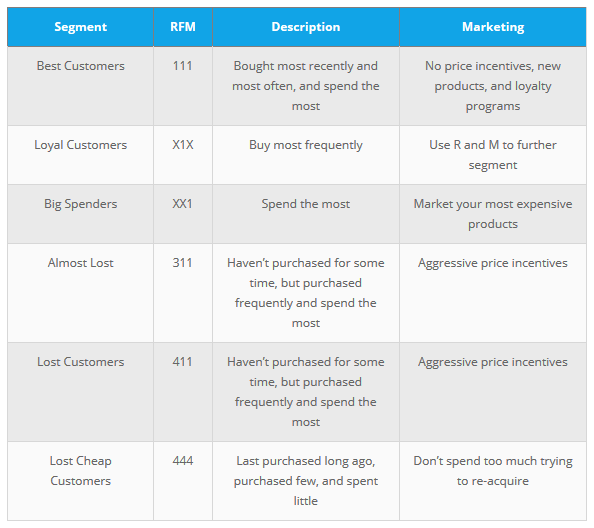

In [244]:
#Here we will assign the scores the appropriate segments and quantify customers that fall in those groups. 

display(Image('https://i.imgur.com/vEUDYTc.png', width=700, unconfined=True))

#Source: https://www.blastam.com/blog/rfm-analysis-boosts-sales

In [247]:
#Assigning of customer groups

print("Best Customers: ",len(segmentation[segmentation['RFM_Score']=='444']))
print('Loyal Customers: ',len(segmentation[segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(segmentation[segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(segmentation[segmentation['RFM_Score']=='244']))
print('Lost Customers: ',len(segmentation[segmentation['RFM_Score']=='144']))
print('Lost Cheap Customers: ',len(segmentation[segmentation['RFM_Score']=='111']))

#------------------Speak to the meaning of this and how useful these insights are to the business ---Murtada

Best Customers:  496
Loyal Customers:  1089
Big Spenders:  1093
Almost Lost:  91
Lost Customers:  15
Lost Cheap Customers:  404


In [250]:
#Using K-Means Clustering on RFM Variables
#Create new dataframe to avoid complications. 

rfm_data = mad.drop(['R_Quartile','F_Quartile','M_Quartile','RFM_Score'],axis=1)
rfm_data.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325.0,2,0.00
12347.0,1.0,7,4310.00
12348.0,74.0,4,1797.24
12349.0,18.0,1,1757.55
12350.0,309.0,1,334.40


In [251]:
rfm_data.corr() #Feature Correlations

,Recency,Frequency,Monetary
Recency,1.000000,-0.259103,-0.131704
Frequency,-0.259103,1.000000,0.565034
Monetary,-0.131704,0.565034,1.000000


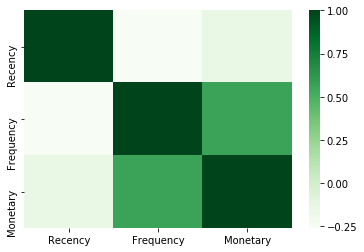

In [256]:
#From the heatmap and from the above feature correlation numbers we see that Frequency and Monetary are correlated best. 
#We will explore this relationship. 

sns.heatmap(rfm_data.corr(),cmap="Greens")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC93A04AC8>,
      dtype=object)

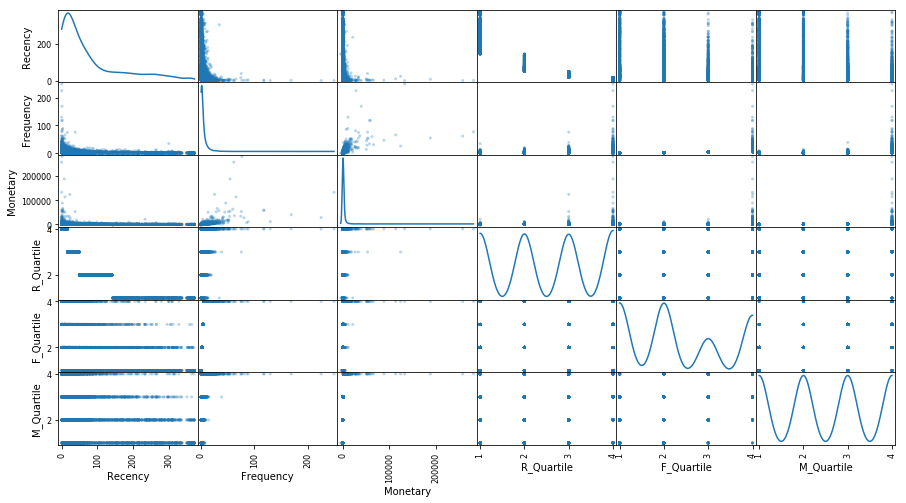

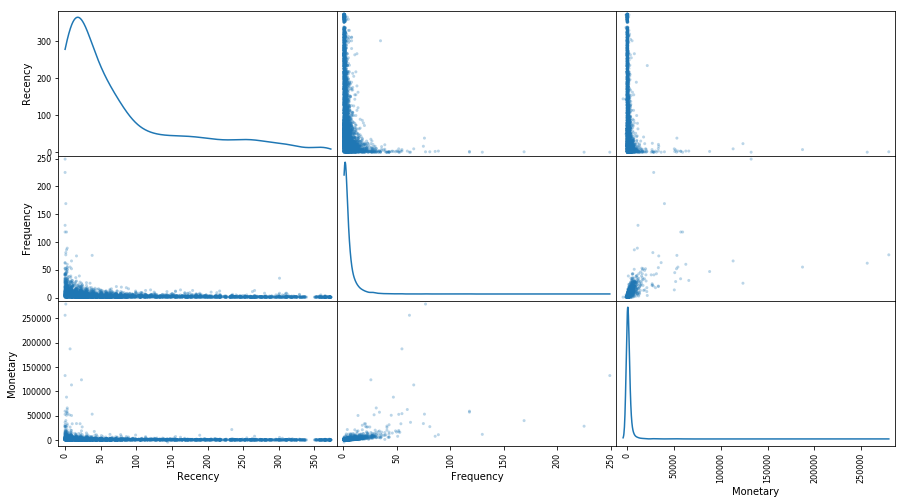

In [257]:
#Visualizing Feature Distributions
#From the visualization, we see that the variables are skewed thus we need to normalize.  


scatter_matrix(mad, alpha = 0.3, figsize = (15,8), diagonal = 'kde')
scatter_matrix(rfm_data, alpha = 0.3, figsize = (15,8), diagonal = 'kde')

In [258]:
#Data normalization using log. 
#Here we had a slight problem with NAN values. We replaced NAN with Mean. 

rfm_r_log = np.log(rfm_data['Recency']+0.1) #log(0) is undefined
rfm_f_log = np.log(rfm_data['Frequency'])
rfm_m_log = np.log(rfm_data['Monetary']+0.1)

C:\Users\Bahr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [259]:
log_data = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,-2.302585,5.784133,0.693147
12347.0,8.368716,0.095310,1.945910
12348.0,7.494063,4.305416,1.386294
12349.0,7.471733,2.895912,0.000000
12350.0,5.812637,5.733665,0.000000


In [260]:
#Created another data frame to test NAN and infinity issues. 

test = log_data

test = test.fillna(test.mean())

test.head()



,Monetary,Recency,Frequency
CustomerID,,,
12346.0,-2.302585,5.784133,0.693147
12347.0,8.368716,0.095310,1.945910
12348.0,7.494063,4.305416,1.386294
12349.0,7.471733,2.895912,0.000000
12350.0,5.812637,5.733665,0.000000


In [261]:
np.any(np.isnan(test))

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC960E3EB8>,
      dtype=object)

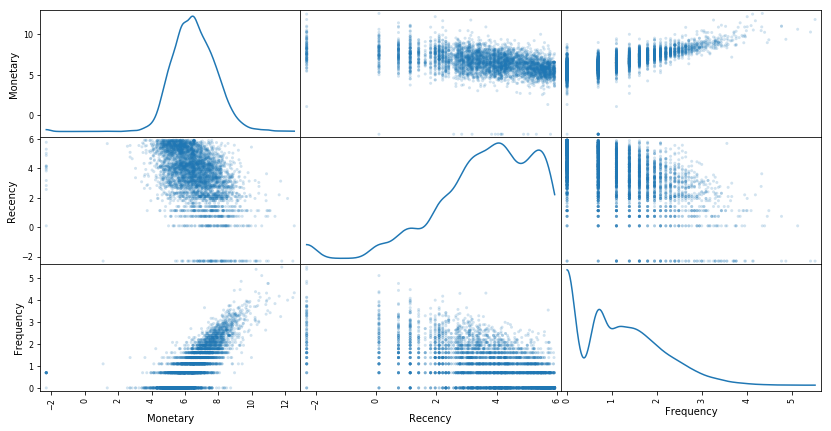

In [172]:
#Visualized result after normalization. 
# ---------Will write more on this section and what the data means. 

scatter_matrix(test, alpha = 0.2, figsize = (14,7), diagonal = 'kde')

In [263]:
test.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.445014,0.757247
Recency,-0.445014,1.000000,-0.552795
Frequency,0.757247,-0.552795,1.000000


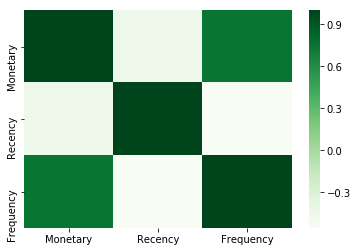

In [264]:
sns.heatmap(test.corr(),cmap="Greens")



Normalization have made the Monetary and Frequency even more correlated. 

## Silhouette test

In [265]:
#K-Means Implementation    ---best score is 2 clusters 

matrix = test.as_matrix()
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

C:\Users\Bahr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


For n_clusters = 2 The average silhouette_score is : 0.4181210493832249
For n_clusters = 3 The average silhouette_score is : 0.34114519103818325
For n_clusters = 4 The average silhouette_score is : 0.3348646747559616
For n_clusters = 5 The average silhouette_score is : 0.32258347082481703
For n_clusters = 6 The average silhouette_score is : 0.33432799151388576
For n_clusters = 7 The average silhouette_score is : 0.32895347750082193
For n_clusters = 8 The average silhouette_score is : 0.3159486708819119
For n_clusters = 9 The average silhouette_score is : 0.31194455253848885


In [266]:
n_clusters = 2  # we will use this initially to visualize low value and high value customers
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.418


Text(0,0.5,'Monetary')

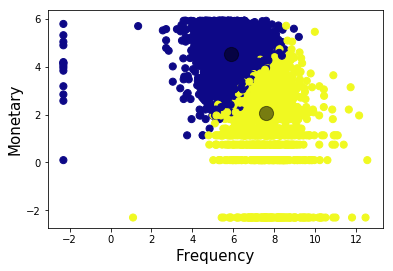

In [177]:
#create a scatter plot identifying high value and low value customers. 
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

In [267]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T

,1,0
Number Customers,2740,1632


In [268]:
n_clusters = 6  # 6 Clusters for potentially the 6 customer groups we've assigned earlier. 
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.334


Text(0,0.5,'Monetary')

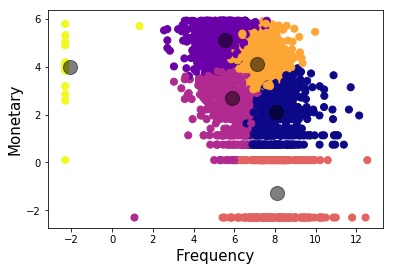

In [272]:
#create a scatter plot identifying customers in increasing value. 
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

In [273]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T

,1,4,2,0,3,5
Number Customers,1453,1154,823,745,182,15


Very interesting, from our earlier customer group assignment using RFM score we got the following: 

Best Customers:  496

Loyal Customers:  1089

Big Spenders:  1093

Almost Lost:  91

Lost Customers:  15

Lost Cheap Customers:  404

Is it valid to compare the clustering's Number of customer VS our manual assignment of customer groups? Pros/Cons. 

### Option B: Association Rule Mining
• Create frequent itemsets and association rules.
• Use tables/visualization to discuss the found results.
• Use several measure for evaluating how interesting different rules are.
• Describe your results. What findings are the most compelling and why? 

### Create lists of different descriptions

In [37]:
from apyori import apriori

In [39]:
marketing_data_grouping = marketing_data.groupby(['InvoiceNo','InvoiceDate','Country','CustomerID'], as_index=False)['UnitPrice','Description','Quantity','TotalPrice'].agg(lambda x: list(x))


##This is to remove any decriptions that may not be strings   
for ind,el in enumerate(marketing_data_grouping['Description']):
    if type(el[0]) != str:
        marketing_data_grouping.drop(ind,inplace=True)

#This will sum the total price for each invoice
marketing_data_grouping['TotalPrice'] = marketing_data_grouping['TotalPrice'].apply(sum)
marketing_data_grouping['QuantityTotal'] = marketing_data_grouping['Quantity'].apply(sum)
marketing_data_grouping['Description_as_string'] = marketing_data_grouping['Description'].apply(lambda x: "-".join(sorted(x)))

In [41]:
marketing_data_grouping['Transaction']=''
for index,row in marketing_data_grouping.iterrows():
    if str(row['InvoiceNo']).startswith("C"):
        marketing_data_grouping.loc[index,'Transaction'] = 'Cancel'
    elif str(row['InvoiceNo']).startswith("A"):
        marketing_data_grouping.loc[index,'Transaction'] = 'Adjust'
    else:
        marketing_data_grouping.loc[index,'Transaction'] = 'Purchase'

In [42]:
list_purchase_marketing_data_grouping_descriptions = []
for el in marketing_data_grouping.loc[marketing_data_grouping['Transaction']=='Purchase','Description']:
    if len(el)>1:
        list_purchase_marketing_data_grouping_descriptions.append(el)

In [43]:
purchase_rules = apriori(list_purchase_marketing_data_grouping_descriptions, min_support=0.001,min_confidence=.2, 
                         max_confidence=.95,min_lift=0.3,max_lift=100,min_length=2, max_length=2 )

purchase_results = list(purchase_rules)

In [44]:
purchase_list = [list(x) for x in purchase_results]
antec = []
conseq = []
support = []
conf = []
lift = []

#Here we are creating a dataframe for each relationship from the apriori rule set
for elem in purchase_list:
    antec.append(str(elem[2][0][0]))
    conseq.append(str(elem[2][0][1]))
    support.append(elem[1])
    conf.append(elem[2][0][2])
    lift.append(elem[2][0][3])

    
purchase_df = pd.DataFrame(data={'antecedants':antec,'consequents':conseq,'support':support,
                                 'confidence':conf,'lift':lift})

#Here we are removing anything related to this data coming from frozensets
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r"frozenset({'",""))
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r'frozenset({"',""))
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r'"})',''))
purchase_df['antecedants'] = purchase_df['antecedants'].apply(lambda x: x.replace(r"'})",''))

purchase_df['consequents'] = purchase_df['consequents'].apply(lambda x: x.replace(r"frozenset({'",""))
purchase_df['consequents'] = purchase_df['consequents'].apply(lambda x: x.replace(r'frozenset({"',""))
purchase_df['consequents'] = purchase_df['consequents'].apply(lambda x: x.replace(r'"})',''))
purchase_df['consequents'] = purchase_df['consequents'].apply(lambda x: x.replace(r"'})",''))

In [51]:
NBR_TOP_VALUES = 25

ants = []
cons = []
loop_round = 0
for ant in purchase_df['antecedants']:
    if ant in ants:
        pass
    elif loop_round >= NBR_TOP_VALUES:
        break
    else:
        ants.append(ant)
        loop_round+=1
loop_round = 0
for con in purchase_df['consequents']:
    if con in cons:
        pass
    elif loop_round >= NBR_TOP_VALUES:
        break
    else:
        cons.append(con)
        loop_round+=1

top_conf_apriori_values = pd.DataFrame(index = ants, columns=cons, data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in top_conf_apriori_values.index and rows['consequents'] in top_conf_apriori_values.columns:
        top_conf_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['confidence']
        
top_lift_apriori_values = pd.DataFrame(index = ants, columns=cons, data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in top_lift_apriori_values.index and rows['consequents'] in top_lift_apriori_values.columns:
        top_lift_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['lift']

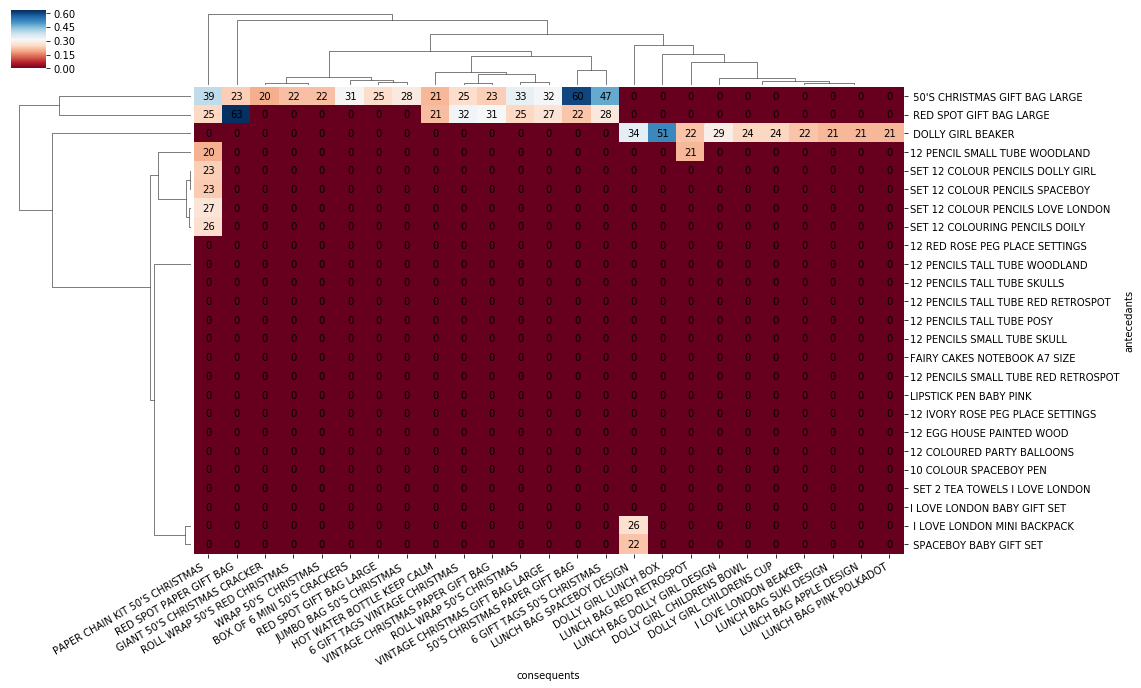

In [52]:

ax = sns.clustermap(top_conf_apriori_values, figsize=(16,10),cmap='RdBu');
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        text = ax.ax_heatmap.text(ind_j, ind_i, int(top_conf_apriori_values.loc[j_text, i_text]*100),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents');
ax.ax_heatmap.set_ylabel('antecedants');

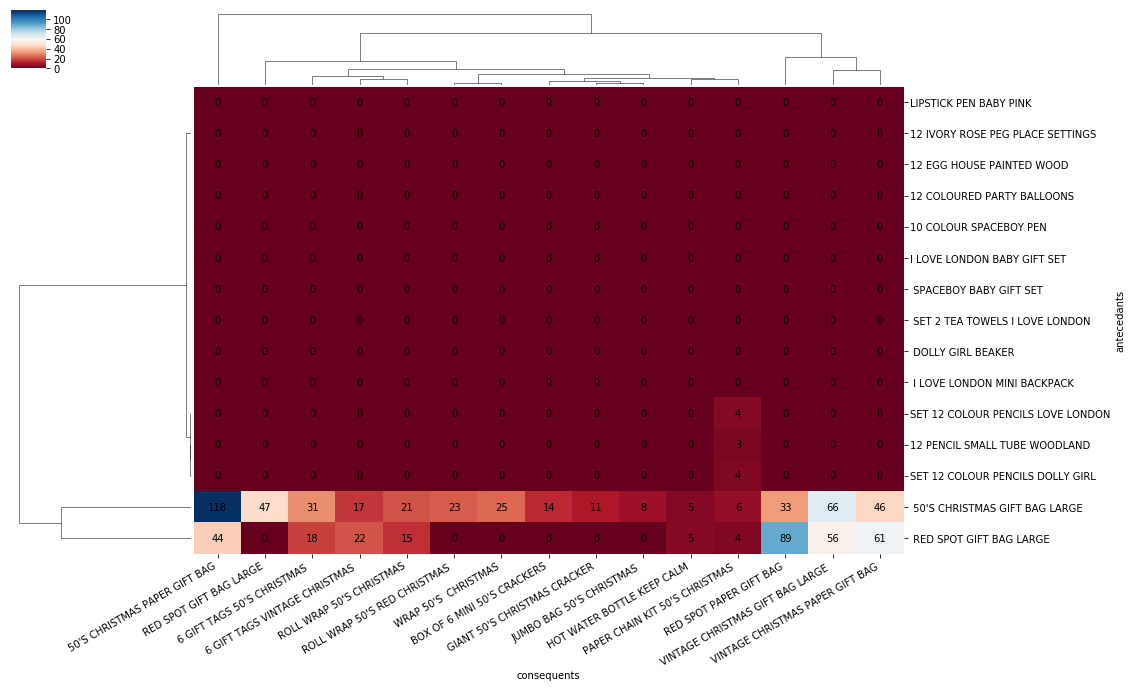

In [47]:

ax = sns.clustermap(top_lift_apriori_values, figsize=(16,10),cmap='RdBu');
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        text = ax.ax_heatmap.text(ind_j, ind_i, int(top_lift_apriori_values.loc[j_text, i_text]),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents');
ax.ax_heatmap.set_ylabel('antecedants');

Here we are displaying the antecedant -> consquent relationships between the sales data for the relationships based on their support. We have quite a few relationships that don't have a value, that is because for our given minimum criteria there was not a relevant relationship found. Certain antecedants have zero relationships found with any of the consequents. 

There is one distinct group which shows a relationship with consequents that are Christmas related items. This could be due to a larger portion of the sales taking place during a certain portion of the year or just that a lot of store revenue can be made during Christmas, so retailers will tend to package more Christmas items with purchases.

In [48]:
most_common_conf_apriori_values = pd.DataFrame(index = purchase_df['antecedants'].value_counts()[:NBR_TOP_VALUES].index, 
                                  columns=purchase_df['consequents'].value_counts()[:NBR_TOP_VALUES].index, 
                                  data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in most_common_conf_apriori_values.index and rows['consequents'] in most_common_conf_apriori_values.columns:
        most_common_conf_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['confidence']
        

most_common_lift_apriori_values = pd.DataFrame(index = purchase_df['antecedants'].value_counts()[:NBR_TOP_VALUES].index, 
                                  columns=purchase_df['consequents'].value_counts()[:NBR_TOP_VALUES].index, 
                                  data = np.zeros([NBR_TOP_VALUES,NBR_TOP_VALUES]))

for index, rows in purchase_df.iterrows():
    if rows['antecedants'] in most_common_lift_apriori_values.index and rows['consequents'] in most_common_lift_apriori_values.columns:
        most_common_lift_apriori_values.at[rows['antecedants'],rows['consequents']]=rows['lift']

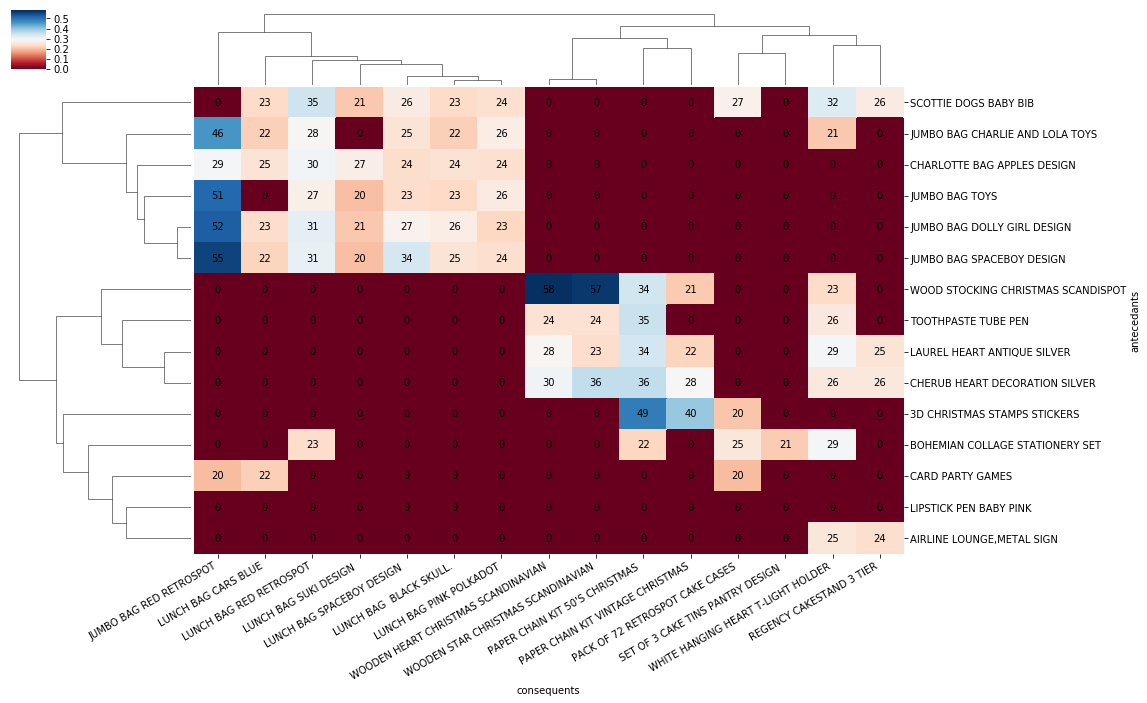

In [49]:

ax = sns.clustermap(most_common_conf_apriori_values, figsize=(16,10),cmap='RdBu');
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        
        text = ax.ax_heatmap.text(ind_j, ind_i, int(most_common_conf_apriori_values.loc[j_text, i_text]*100),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents');
ax.ax_heatmap.set_ylabel('antecedants');

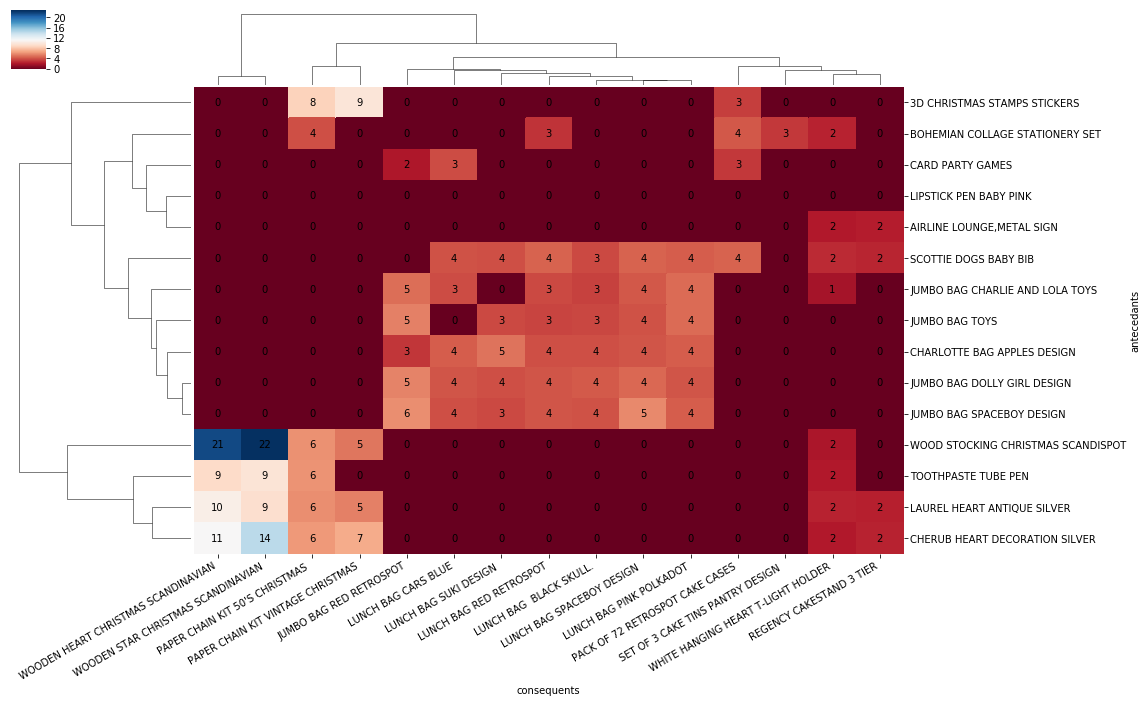

In [50]:

ax = sns.clustermap(most_common_lift_apriori_values, figsize=(16,10),cmap='RdBu');
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=30, ha='right');

for ind_i,i in enumerate(ax.ax_heatmap.xaxis.get_ticklabels()):
    for ind_j,j in enumerate(ax.ax_heatmap.yaxis.get_ticklabels()):
        
        #Removes text added to tick labels
        i_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(i))
        i_text = re.sub(r"[\'\"]\)$",'',i_text)
        
        j_text = re.sub("Text\W(\d*\.\d|\d),\d.[\"\']",'',str(j))
        j_text = re.sub(r"[\'\"]\)$",'',j_text)

        
        text = ax.ax_heatmap.text(ind_j, ind_i, int(most_common_lift_apriori_values.loc[j_text, i_text]),
                       ha="center", va="center", color="black",position=(ind_i+.5,ind_j+.5))

ax.ax_heatmap.set_xlabel('consequents');
ax.ax_heatmap.set_ylabel('antecedants');

With the graph above we are showing the items that show up most commonly in the antecedents and consequents. With this relationship we then display the relative confidence for each pair. 

This graph is interesting because there are a couple of distinct sections with relative confidence. For this chart there seems to be a range of .30 to 1 for the confidence between the consquent and the antecedent.

# Deployment (10 points total)
• Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
• How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?
• How would your deploy your model for interested parties?
• What other data should be collected?
• How often would the model need to be updated, etc.? 

# Exceptional Work (10 points total)
• You have free reign to provide additional analyses or combine analyses 